In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
#df = pd.read_csv('../experimental-results/results_mocked.csv', sep=',',header=0)

In [3]:
#df

In [12]:
def plot_chart_for_workload(filename : str):
    df = pd.read_csv('../experimental-results/' + filename, sep=',',header=0)

    datasets = ['books_200M_uint32', 'fb_200M_uint32', 'osmc_200M_uint32', 'wiki_200M_uint32']

    best_results_alex = []
    best_results_binary_search = []
    best_results_btree = []
    best_results_pgm = []
    for dataset_name in datasets:
        best_results_alex.append(df[(df["dataset_name"] == dataset_name) & (df["index_name"]=='ALEX')]['median_time'].min())
        best_results_binary_search.append(df[(df["dataset_name"] == dataset_name) & (df["index_name"]=='BinarySearch')]['median_time'].min())
        best_results_btree.append(df[(df["dataset_name"] == dataset_name) & (df["index_name"]=='BTree')]['median_time'].min())
        best_results_pgm.append(df[(df["dataset_name"] == dataset_name) & (df["index_name"]=='DynamicPGM')]['median_time'].min())

    N = 4
    ind = np.arange(N) 
    width = 0.17

    bar1 = plt.bar(ind, best_results_alex, width, color = 'green')
    bar2 = plt.bar(ind+width, best_results_binary_search, width, color = 'orange')
    bar3 = plt.bar(ind+width*2, best_results_btree, width, color = 'blue')
    bar4 = plt.bar(ind+width*3, best_results_pgm, width, color = 'red')

    #plt.xlabel("Datasets")
    #plt.ylabel('Latencies')

    plt.xticks(ind+width*1.5,['books', 'fb', 'osmc', 'wiki'])

    # Put a legend above plot
    #plt.legend((bar1, bar2, bar3, bar4), ('ALEX', 'BinarySearch', 'BTree', 'PGM'), bbox_to_anchor=(0,1.02,1,0.2), loc='upper left', ncol=4)
    plt.show()

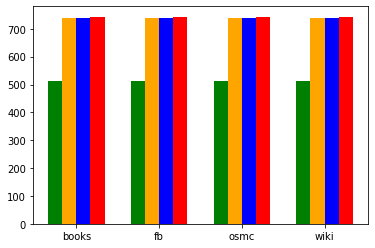

In [13]:
plot_chart_for_workload('results_mocked.csv')